In [1]:
import pandas as pd

In [2]:
hardwares = ['12_proc_30_ram', '8_proc_20_ram']

In [11]:
dataToPlot = ['cpuUsage']
folders = ['1h']

In [ ]:
tests = ['2_repliki', '4_repliki', '6_replik', '8_replik', '10_replik']

In [13]:
tests = ['transakcje_60s', 'transakcje_120s', 'transakcje_180s', 'transakcje_240s', 'transakcje_300s']

In [8]:
tests = ['zapytania_20ms', 'zapytania_100ms', 'zapytania_500ms', 'zapytania_1000ms', 'zapytania_2000ms']

In [6]:
tests = ['strategia1_200', 'strategia2_200', 'strategia3_200']

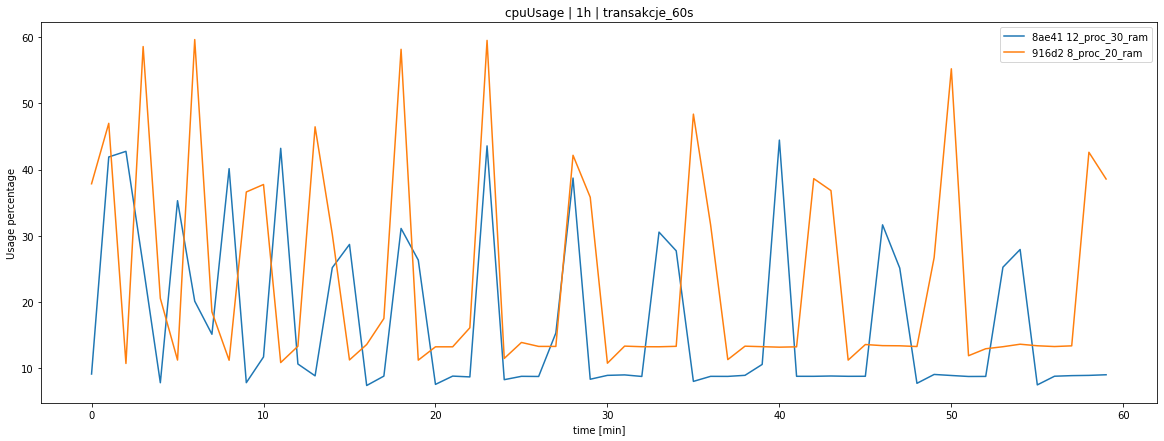

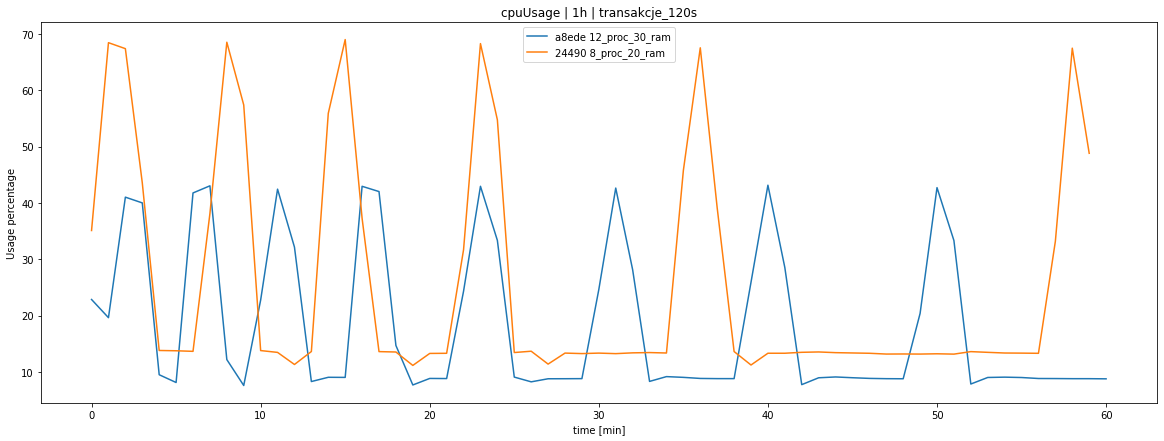

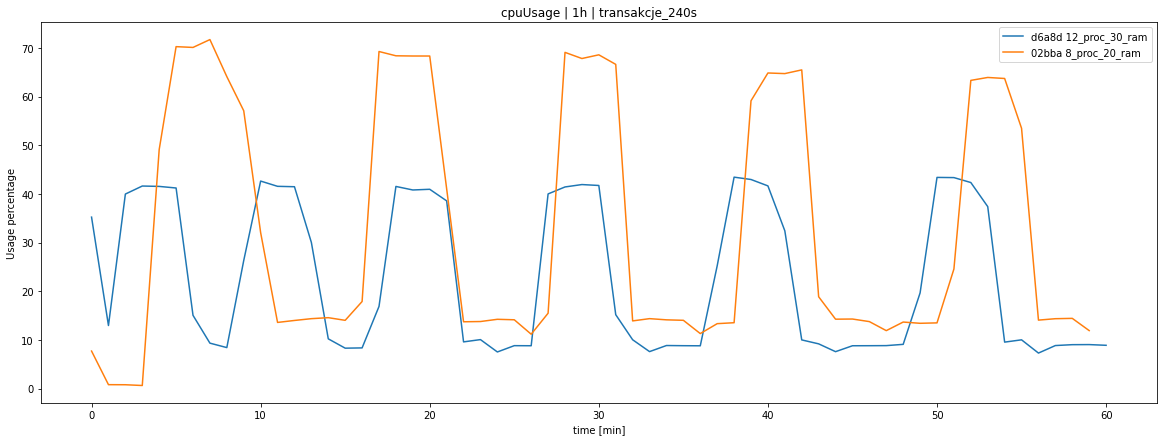

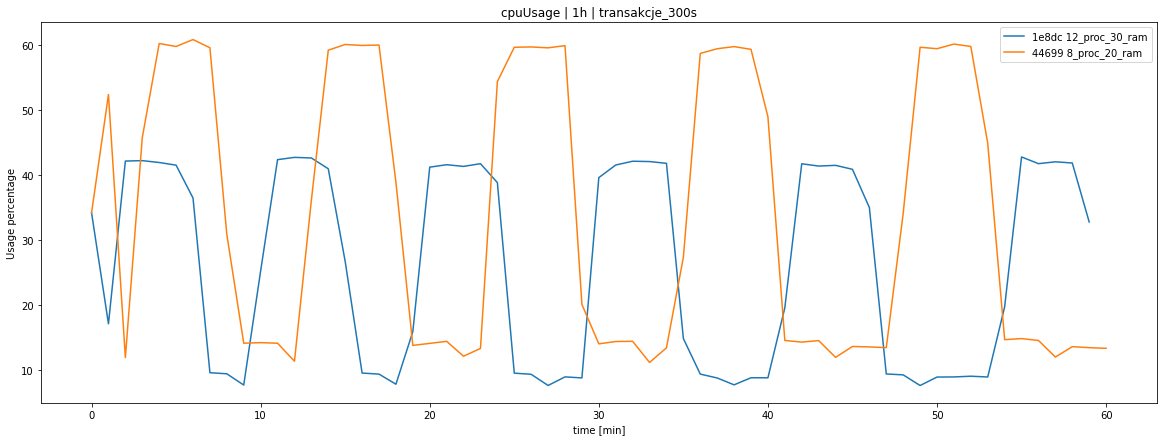

In [14]:
for f in folders:
    for j in dataToPlot:
        for i in tests:
            data = pd.DataFrame()
            try:
                for h in hardwares:

                    replicas = pd.read_csv('Testy/' + h + '/Testy/' + f + '/' + i + '/stock.csv', usecols=['replicaId']).replicaId.unique().tolist()

                    q = replicas[0][0:5:1] + ' ' + h
                    try:
                        d = pd.read_csv('Testy/' + h + '/Testy/' + f + '/' + i + '/stock.csv', usecols=['timestamp', j, 'replicaId'])
                    except:
                        continue
                    d = d.sort_values(by=['timestamp'])
                    t = d['timestamp'][0]
                    d['time [min]'] = d['timestamp'].apply(lambda x: (x - t)/60000)
                    d[j] = d[j].apply(lambda x: x*100)
                    d = d[(d['replicaId'] == replicas[0])]

                    customDataFrame = pd.DataFrame({'time [min]': d['time [min]'], q: d[j]})
                    customDataFrame = customDataFrame.loc[customDataFrame['time [min]'] < 60]

                    data = pd.concat([data, customDataFrame])
                ax = data.set_index('time [min]').plot(figsize=(20, 7), title = j + ' | ' + f + ' | ' + i)
                ax.set_xlabel("time [min]")
                ax.set_ylabel("Usage percentage")
            except:
                        continue